### Big Data Architecture and Data Governance

In [2]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# importing the dataset
df=pd.read_csv("crime.csv", decimal = ',' , encoding = "ISO-8859-1")

C:\Users\Ashmita\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Exploring the dataset

In below lines of code, we are just trying to check the dataset description, datatypes, sample size etc.

In [4]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.26260773,-71.12118637,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.35211146,-71.13531147,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.30812619,-71.07692974,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.35945371,-71.05964817,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.37525782,-71.02466343,"(42.37525782, -71.02466343)"


In [5]:
df.info

<bound method DataFrame.info of        INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP  \
0           I182080058          2403               Disorderly Conduct   
1           I182080053          3201                    Property Lost   
2           I182080052          2647                            Other   
3           I182080051           413               Aggravated Assault   
4           I182080050          3122                         Aircraft   
5           I182080049          1402                        Vandalism   
6           I182080048          3803  Motor Vehicle Accident Response   
7           I182080047          3301                  Verbal Disputes   
8           I182080045           802                   Simple Assault   
9           I182080044          3410                            Towed   
10          I182080043          3803  Motor Vehicle Accident Response   
11          I182080042           706                       Auto Theft   
12          I182080

In [6]:
df.dtypes

INCIDENT_NUMBER        object
OFFENSE_CODE            int64
OFFENSE_CODE_GROUP     object
OFFENSE_DESCRIPTION    object
DISTRICT               object
REPORTING_AREA         object
SHOOTING               object
OCCURRED_ON_DATE       object
YEAR                    int64
MONTH                   int64
DAY_OF_WEEK            object
HOUR                    int64
UCR_PART               object
STREET                 object
Lat                    object
Long                   object
Location               object
dtype: object

In [7]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR
count,327820.000000,327820.000000,327820.000000,327820.000000
mean,2317.961171,2016.598676,6.672213,13.114840
std,1184.990073,1.009775,3.253984,6.292714
min,111.000000,2015.000000,1.000000,0.000000
25%,1001.000000,2016.000000,4.000000,9.000000
50%,2907.000000,2017.000000,7.000000,14.000000
75%,3201.000000,2017.000000,9.000000,18.000000
max,3831.000000,2018.000000,12.000000,23.000000


### Data Cleaning

We will be cleaning the dataset to get estimate of actual data and change any column data type in correct formats.

Following action will be performed:
1. Changing date column in proper format.
2. We will also be checking the null values
3. Percentage of null values in the data
4. Change object type into string format.
5. Replace missing values with 'N' under shooting column and all NaN will be replaced by ' '

In [8]:
df["OCCURRED_ON_DATE"] = pd.to_datetime(df["OCCURRED_ON_DATE"],format="%Y-%m-%d %H:%M:%S")

In [9]:
df.isnull().values.any()

True

In [10]:
df.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1774
REPORTING_AREA              0
SHOOTING               326765
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   93
STREET                  10977
Lat                     20632
Long                    20632
Location                    0
dtype: int64

In [11]:
df.isnull().sum().sum()

380873

In [12]:
df.groupby('OFFENSE_CODE_GROUP').count()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
OFFENSE_CODE_GROUP,,,,,,,,,,,,,,,,
Aggravated Assault,8033,8033,8033,8004,8033,539,8033,8033,8033,8033,8033,8033,7715,7470,7470,8033
Aircraft,37,37,37,36,37,0,37,37,37,37,37,37,31,32,32,37
Arson,95,95,95,95,95,0,95,95,95,95,95,95,94,92,92,95
Assembly or Gathering Violations,977,977,977,973,977,0,977,977,977,977,977,977,951,936,936,977
Auto Theft,4954,4954,4954,4928,4954,0,4954,4954,4954,4954,4954,4954,4756,4636,4636,4954
Auto Theft Recovery,1082,1082,1082,1072,1082,0,1082,1082,1082,1082,1082,1082,1045,1006,1006,1082
Ballistics,1007,1007,1007,1002,1007,45,1007,1007,1007,1007,1007,1007,979,966,966,1007
Biological Threat,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2
Bomb Hoax,77,77,77,77,77,0,77,77,77,77,77,77,75,72,72,77


In [13]:
df['INCIDENT_NUMBER'].astype(str)

0            I182080058
1            I182080053
2            I182080052
3            I182080051
4            I182080050
5            I182080049
6            I182080048
7            I182080047
8            I182080045
9            I182080044
10           I182080043
11           I182080042
12           I182080041
13           I182080040
14           I182080039
15           I182080038
16           I182080037
17           I182080035
18           I182080034
19           I182080031
20           I182080030
21           I182080029
22           I182080028
23           I182080027
24           I182080027
25           I182080026
26           I182080025
27           I182080024
28           I182080023
29           I182080022
              ...      
327790    I110551302-00
327791    I110551302-00
327792    I110372326-00
327793    I110372326-00
327794    I110261417-00
327795    I110261417-00
327796    I110177502-00
327797    I110177502-00
327798    I110177502-00
327799    I100636670-00
327800    I10063

In [14]:
df['OFFENSE_CODE_GROUP'].astype(str)

0                      Disorderly Conduct
1                           Property Lost
2                                   Other
3                      Aggravated Assault
4                                Aircraft
5                               Vandalism
6         Motor Vehicle Accident Response
7                         Verbal Disputes
8                          Simple Assault
9                                   Towed
10        Motor Vehicle Accident Response
11                             Auto Theft
12                     Medical Assistance
13                     Investigate Person
14                     Medical Assistance
15        Motor Vehicle Accident Response
16                                  Other
17                                  Other
18                     Investigate Person
19                   Fire Related Reports
20        Motor Vehicle Accident Response
21                                Larceny
22                   Investigate Property
23                        Verbal D

In [15]:
df['OFFENSE_DESCRIPTION'].astype(str)

0                                   DISTURBING THE PEACE
1                                        PROPERTY - LOST
2                              THREATS TO DO BODILY HARM
3                         ASSAULT - AGGRAVATED - BATTERY
4                                     AIRCRAFT INCIDENTS
5                                              VANDALISM
6                         M/V ACCIDENT - PERSONAL INJURY
7                                         VERBAL DISPUTE
8                               ASSAULT SIMPLE - BATTERY
9                                    TOWED MOTOR VEHICLE
10                        M/V ACCIDENT - PERSONAL INJURY
11                     AUTO THEFT - MOTORCYCLE / SCOOTER
12                         SICK/INJURED/MEDICAL - PERSON
13                                    INVESTIGATE PERSON
14                         SICK/INJURED/MEDICAL - PERSON
15                 M/V - LEAVING SCENE - PROPERTY DAMAGE
16                             THREATS TO DO BODILY HARM
17                             

In [16]:
df['DISTRICT'].astype(str)

0         E18
1         D14
2          B2
3          A1
4          A7
5         C11
6         nan
7          B2
8         E18
9          D4
10        D14
11        E13
12        E18
13         B3
14         B3
15        nan
16        C11
17         B2
18         D4
19        C11
20         C6
21         D4
22         B2
23         B2
24         B2
25         C6
26        nan
27        E13
28         D4
29        D14
         ... 
327790     D4
327791     D4
327792     A1
327793     A1
327794     B2
327795     B2
327796     B2
327797     B2
327798     B2
327799     D4
327800     D4
327801     A1
327802     A1
327803    E13
327804     B2
327805     B2
327806    C11
327807    C11
327808     B3
327809     B3
327810     A1
327811     A1
327812     A1
327813    E13
327814    E13
327815     D4
327816    E18
327817    E18
327818    E13
327819     D4
Name: DISTRICT, Length: 327820, dtype: object

In [17]:

df[ 'REPORTING_AREA'] .astype(str)

0         495
1         795
2         329
3          92
4          36
5         351
6            
7         603
8         543
9         621
10        750
11        582
12        484
13        427
14        469
15           
16        385
17        326
18        626
19        338
20        234
21        146
22        295
23        294
24        294
25        256
26           
27        640
28        165
29        779
         ... 
327790    171
327791    171
327792     97
327793     97
327794    324
327795    324
327796    318
327797    318
327798    318
327799    285
327800    285
327801     77
327802     77
327803    572
327804    304
327805    304
327806    355
327807    355
327808    458
327809    458
327810    111
327811    111
327812    111
327813    912
327814    912
327815    285
327816    520
327817    520
327818    569
327819    903
Name: REPORTING_AREA, Length: 327820, dtype: object

In [18]:
df['OCCURRED_ON_DATE'].astype(str)

0         2018-10-03 20:13:00
1         2018-08-30 20:00:00
2         2018-10-03 19:20:00
3         2018-10-03 20:00:00
4         2018-10-03 20:49:00
5         2018-10-02 20:40:00
6         2018-10-03 20:16:00
7         2018-10-03 19:32:00
8         2018-10-03 19:27:51
9         2018-10-03 20:00:00
10        2018-10-03 19:33:00
11        2018-10-01 20:00:00
12        2018-10-03 17:18:00
13        2018-10-03 08:00:00
14        2018-10-03 19:58:30
15        2018-10-03 19:30:00
16        2018-10-03 18:35:00
17        2018-10-03 19:56:00
18        2018-10-03 18:41:00
19        2018-10-03 18:18:00
20        2018-10-02 20:00:00
21        2018-10-03 19:09:00
22        2018-10-03 18:24:00
23        2018-10-03 18:53:00
24        2018-10-03 18:53:00
25        2017-08-31 00:00:00
26        2018-10-03 19:05:00
27        2018-10-03 17:30:00
28        2018-05-12 00:00:00
29        2018-10-03 19:19:00
                 ...         
327790    2015-07-22 22:00:00
327791    2015-07-22 22:00:00
327792    

In [19]:
df['DAY_OF_WEEK'].astype(str)

0         Wednesday
1          Thursday
2         Wednesday
3         Wednesday
4         Wednesday
5           Tuesday
6         Wednesday
7         Wednesday
8         Wednesday
9         Wednesday
10        Wednesday
11           Monday
12        Wednesday
13        Wednesday
14        Wednesday
15        Wednesday
16        Wednesday
17        Wednesday
18        Wednesday
19        Wednesday
20          Tuesday
21        Wednesday
22        Wednesday
23        Wednesday
24        Wednesday
25         Thursday
26        Wednesday
27        Wednesday
28         Saturday
29        Wednesday
            ...    
327790    Wednesday
327791    Wednesday
327792      Tuesday
327793      Tuesday
327794       Friday
327795       Friday
327796       Friday
327797       Friday
327798       Friday
327799       Sunday
327800       Sunday
327801       Monday
327802       Monday
327803       Monday
327804       Friday
327805       Friday
327806       Monday
327807       Monday
327808       Friday


In [20]:
df['STREET'].astype(str)

0              ARLINGTON ST
1                ALLSTON ST
2                  DEVON ST
3              CAMBRIDGE ST
4               PRESCOTT ST
5            DORCHESTER AVE
6                       nan
7                TREMONT ST
8                  AVILA RD
9          COMMONWEALTH AVE
10                FOSTER ST
11                BYNNER ST
12                BELNEL RD
13             ELIZABETH ST
14               FOTTLER RD
15                      nan
16                HALLET ST
17               DUNKELD ST
18            KILMARNOCK ST
19             NAVILLUS TER
20              COLUMBIA RD
21           HUNTINGTON AVE
22              HANSFORD ST
23                 AKRON ST
24                 AKRON ST
25          MOUNT VERNON ST
26                      nan
27              BOYLSTON ST
28             HARRISON AVE
29             MONTCALM AVE
                ...        
327790         HARRISON AVE
327791         HARRISON AVE
327792            SCHOOL ST
327793            SCHOOL ST
327794           BOW

In [21]:
 df['UCR_PART'].astype(str)

0           Part Two
1         Part Three
2           Part Two
3           Part One
4         Part Three
5           Part Two
6         Part Three
7         Part Three
8           Part Two
9         Part Three
10        Part Three
11          Part One
12        Part Three
13        Part Three
14        Part Three
15        Part Three
16          Part Two
17          Part Two
18        Part Three
19        Part Three
20        Part Three
21          Part One
22        Part Three
23        Part Three
24          Part One
25          Part Two
26          Part One
27          Part Two
28        Part Three
29        Part Three
             ...    
327790    Part Three
327791      Part One
327792      Part One
327793    Part Three
327794    Part Three
327795      Part One
327796    Part Three
327797      Part Two
327798    Part Three
327799      Part One
327800    Part Three
327801    Part Three
327802      Part One
327803    Part Three
327804      Part Two
327805      Part Two
327806    Par

In [22]:

df['Long'].astype(str)

0         -71.12118637
1         -71.13531147
2         -71.07692974
3         -71.05964817
4         -71.02466343
5         -71.06046974
6         -71.05676415
7         -71.10377843
8         -71.12802506
9         -71.08936284
10        -71.15778368
11        -71.10892316
12        -71.10306140
13        -71.08798275
14        -71.09640610
15        -71.09042564
16        -71.04736497
17        -71.07562922
18        -71.09937714
19        -71.06213111
20        -71.03851306
21        -71.07849582
22        -71.08351579
23        -71.08563758
24        -71.08563758
25        -71.04210959
26        -71.07949284
27        -71.10394558
28        -71.06516235
29        -71.14841124
              ...     
327790    -71.07436364
327791    -71.07436364
327792    -71.05832551
327793    -71.05832551
327794    -71.06615319
327795    -71.06615319
327796    -71.08909334
327797    -71.08909334
327798    -71.08909334
327799    -71.08574813
327800    -71.08574813
327801    -71.06229949
327802    -

In [23]:
 df['Location'].astype(str)

0         (42.26260773, -71.12118637)
1         (42.35211146, -71.13531147)
2         (42.30812619, -71.07692974)
3         (42.35945371, -71.05964817)
4         (42.37525782, -71.02466343)
5         (42.29919694, -71.06046974)
6         (42.32073413, -71.05676415)
7         (42.33380683, -71.10377843)
8         (42.25614494, -71.12802506)
9         (42.34886600, -71.08936284)
10        (42.34432328, -71.15778368)
11        (42.32324363, -71.10892316)
12        (42.26059891, -71.10306140)
13        (42.27986526, -71.08798275)
14        (42.27791927, -71.09640610)
15        (42.31596119, -71.09042564)
16        (42.28076737, -71.04736497)
17        (42.31277782, -71.07562922)
18        (42.34268073, -71.09937714)
19        (42.30998781, -71.06213111)
20        (42.33001489, -71.03851306)
21        (42.34797240, -71.07849582)
22        (42.32527567, -71.08351579)
23        (42.32579408, -71.08563758)
24        (42.32579408, -71.08563758)
25        (42.31779354, -71.04210959)
26        (4

In [24]:
df['Lat'].astype(str)

0         42.26260773
1         42.35211146
2         42.30812619
3         42.35945371
4         42.37525782
5         42.29919694
6         42.32073413
7         42.33380683
8         42.25614494
9         42.34886600
10        42.34432328
11        42.32324363
12        42.26059891
13        42.27986526
14        42.27791927
15        42.31596119
16        42.28076737
17        42.31277782
18        42.34268073
19        42.30998781
20        42.33001489
21        42.34797240
22        42.32527567
23        42.32579408
24        42.32579408
25        42.31779354
26        42.34952402
27        42.31694189
28        42.34285014
29        42.35321122
             ...     
327790    42.33555954
327791    42.33555954
327792    42.35742837
327793    42.35742837
327794    42.30703835
327795    42.30703835
327796    42.31127726
327797    42.31127726
327798    42.31127726
327799    42.33695098
327800    42.33695098
327801    42.36164502
327802    42.36164502
327803    42.31362799
327804    

In [25]:
df['OFFENSE_CODE'].astype(str)

0         2403
1         3201
2         2647
3          413
4         3122
5         1402
6         3803
7         3301
8          802
9         3410
10        3803
11         706
12        3006
13        3115
14        3006
15        3831
16        2647
17        2647
18        3115
19        3108
20        3831
21         613
22        3114
23        3301
24         619
25        2629
26         311
27        1842
28        3115
29        3006
          ... 
327790    3125
327791     623
327792     403
327793    3125
327794    3125
327795     619
327796    3125
327797     802
327798    3125
327799     629
327800    3125
327801    3125
327802     339
327803    3125
327804    2907
327805    2910
327806    3125
327807    3125
327808     403
327809    3125
327810    3125
327811    1848
327812    1849
327813    1864
327814    3125
327815    3125
327816     111
327817    3125
327818    3125
327819    3125
Name: OFFENSE_CODE, Length: 327820, dtype: object

In [26]:
df.dtypes

INCIDENT_NUMBER                object
OFFENSE_CODE                    int64
OFFENSE_CODE_GROUP             object
OFFENSE_DESCRIPTION            object
DISTRICT                       object
REPORTING_AREA                 object
SHOOTING                       object
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                    object
HOUR                            int64
UCR_PART                       object
STREET                         object
Lat                            object
Long                           object
Location                       object
dtype: object

In [27]:
import numpy as np
df['SHOOTING'].replace(np.nan , 'N' , inplace = True , regex=True)

In [28]:
df.dropna(axis=0, how='all', thresh=None,subset=None, inplace=True)

In [30]:
df.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,N,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.26260773,-71.12118637,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,N,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.35211146,-71.13531147,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,N,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.30812619,-71.07692974,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,N,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.35945371,-71.05964817,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,N,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.37525782,-71.02466343,"(42.37525782, -71.02466343)"
5,I182080049,1402,Vandalism,VANDALISM,C11,351,N,2018-10-02 20:40:00,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.29919694,-71.06046974,"(42.29919694, -71.06046974)"
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,N,2018-10-03 20:16:00,2018,10,Wednesday,20,Part Three,NaN,42.32073413,-71.05676415,"(42.32073413, -71.05676415)"
7,I182080047,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,N,2018-10-03 19:32:00,2018,10,Wednesday,19,Part Three,TREMONT ST,42.33380683,-71.10377843,"(42.33380683, -71.10377843)"
8,I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,N,2018-10-03 19:27:51,2018,10,Wednesday,19,Part Two,AVILA RD,42.25614494,-71.12802506,"(42.25614494, -71.12802506)"
9,I182080044,3410,Towed,TOWED MOTOR VEHICLE,D4,621,N,2018-10-03 20:00:00,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.34886600,-71.08936284,"(42.34886600, -71.08936284)"


In [32]:
df.to_csv("cleaned_dataset.csv", sep=',', encoding = "ISO-8859-1")

In [27]:
import numpy as np
df['STREET'].replace(np.nan , ' ' , inplace = True , regex=True)

In [28]:
import numpy as np
df['DISTRICT'].replace(np.nan , ' ' , inplace = True , regex=True)

In [29]:
import numpy as np
df['Lat'].replace(np.nan , '0.0' , inplace = True , regex=True)

In [30]:
df['Long'].replace(np.nan , '0.0' , inplace = True , regex=True)

In [31]:
df['UCR_PART'].replace(np.nan , ' ' , inplace = True , regex=True)

In [32]:
df['SHOOTING'].astype(str)

0         N
1         N
2         N
3         N
4         N
5         N
6         N
7         N
8         N
9         N
10        N
11        N
12        N
13        N
14        N
15        N
16        N
17        N
18        N
19        N
20        N
21        N
22        N
23        N
24        N
25        N
26        N
27        N
28        N
29        N
         ..
327790    N
327791    N
327792    N
327793    N
327794    N
327795    N
327796    N
327797    N
327798    N
327799    N
327800    N
327801    N
327802    N
327803    N
327804    N
327805    N
327806    N
327807    N
327808    N
327809    N
327810    N
327811    N
327812    N
327813    N
327814    N
327815    N
327816    N
327817    N
327818    N
327819    N
Name: SHOOTING, Length: 327820, dtype: object

In [33]:

df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,N,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.26260773,-71.12118637,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,N,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.35211146,-71.13531147,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,N,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.30812619,-71.07692974,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,N,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.35945371,-71.05964817,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,N,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.37525782,-71.02466343,"(42.37525782, -71.02466343)"


Verifying whether any column still has any null values.

In [34]:
df.isnull().values.any()

False

In [35]:
df.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [36]:
df.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,N,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.26260773,-71.12118637,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,N,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.35211146,-71.13531147,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,N,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.30812619,-71.07692974,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,N,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.35945371,-71.05964817,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,N,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.37525782,-71.02466343,"(42.37525782, -71.02466343)"
5,I182080049,1402,Vandalism,VANDALISM,C11,351,N,2018-10-02 20:40:00,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.29919694,-71.06046974,"(42.29919694, -71.06046974)"
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,,,N,2018-10-03 20:16:00,2018,10,Wednesday,20,Part Three,,42.32073413,-71.05676415,"(42.32073413, -71.05676415)"
7,I182080047,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,N,2018-10-03 19:32:00,2018,10,Wednesday,19,Part Three,TREMONT ST,42.33380683,-71.10377843,"(42.33380683, -71.10377843)"
8,I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,N,2018-10-03 19:27:51,2018,10,Wednesday,19,Part Two,AVILA RD,42.25614494,-71.12802506,"(42.25614494, -71.12802506)"
9,I182080044,3410,Towed,TOWED MOTOR VEHICLE,D4,621,N,2018-10-03 20:00:00,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.34886600,-71.08936284,"(42.34886600, -71.08936284)"


### Performing EDA on the dataset and plotting graphs

In [37]:

count_week = df.groupby(df.DAY_OF_WEEK).count()
count_week

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,HOUR,UCR_PART,STREET,Lat,Long,Location
DAY_OF_WEEK,,,,,,,,,,,,,,,,
Friday,49758,49758,49758,49758,49758,49758,49758,49758,49758,49758,49758,49758,49758,49758,49758,49758
Monday,46970,46970,46970,46970,46970,46970,46970,46970,46970,46970,46970,46970,46970,46970,46970,46970
Saturday,45969,45969,45969,45969,45969,45969,45969,45969,45969,45969,45969,45969,45969,45969,45969,45969
Sunday,41374,41374,41374,41374,41374,41374,41374,41374,41374,41374,41374,41374,41374,41374,41374,41374
Thursday,47872,47872,47872,47872,47872,47872,47872,47872,47872,47872,47872,47872,47872,47872,47872,47872
Tuesday,47726,47726,47726,47726,47726,47726,47726,47726,47726,47726,47726,47726,47726,47726,47726,47726
Wednesday,48151,48151,48151,48151,48151,48151,48151,48151,48151,48151,48151,48151,48151,48151,48151,48151


In [38]:
d1=df.groupby(df.OFFENSE_CODE_GROUP).count()
d1

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
OFFENSE_CODE_GROUP,,,,,,,,,,,,,,,,
Aggravated Assault,8033,8033,8033,8033,8033,8033,8033,8033,8033,8033,8033,8033,8033,8033,8033,8033
Aircraft,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
Arson,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95
Assembly or Gathering Violations,977,977,977,977,977,977,977,977,977,977,977,977,977,977,977,977
Auto Theft,4954,4954,4954,4954,4954,4954,4954,4954,4954,4954,4954,4954,4954,4954,4954,4954
Auto Theft Recovery,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082
Ballistics,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007
Biological Threat,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Bomb Hoax,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77


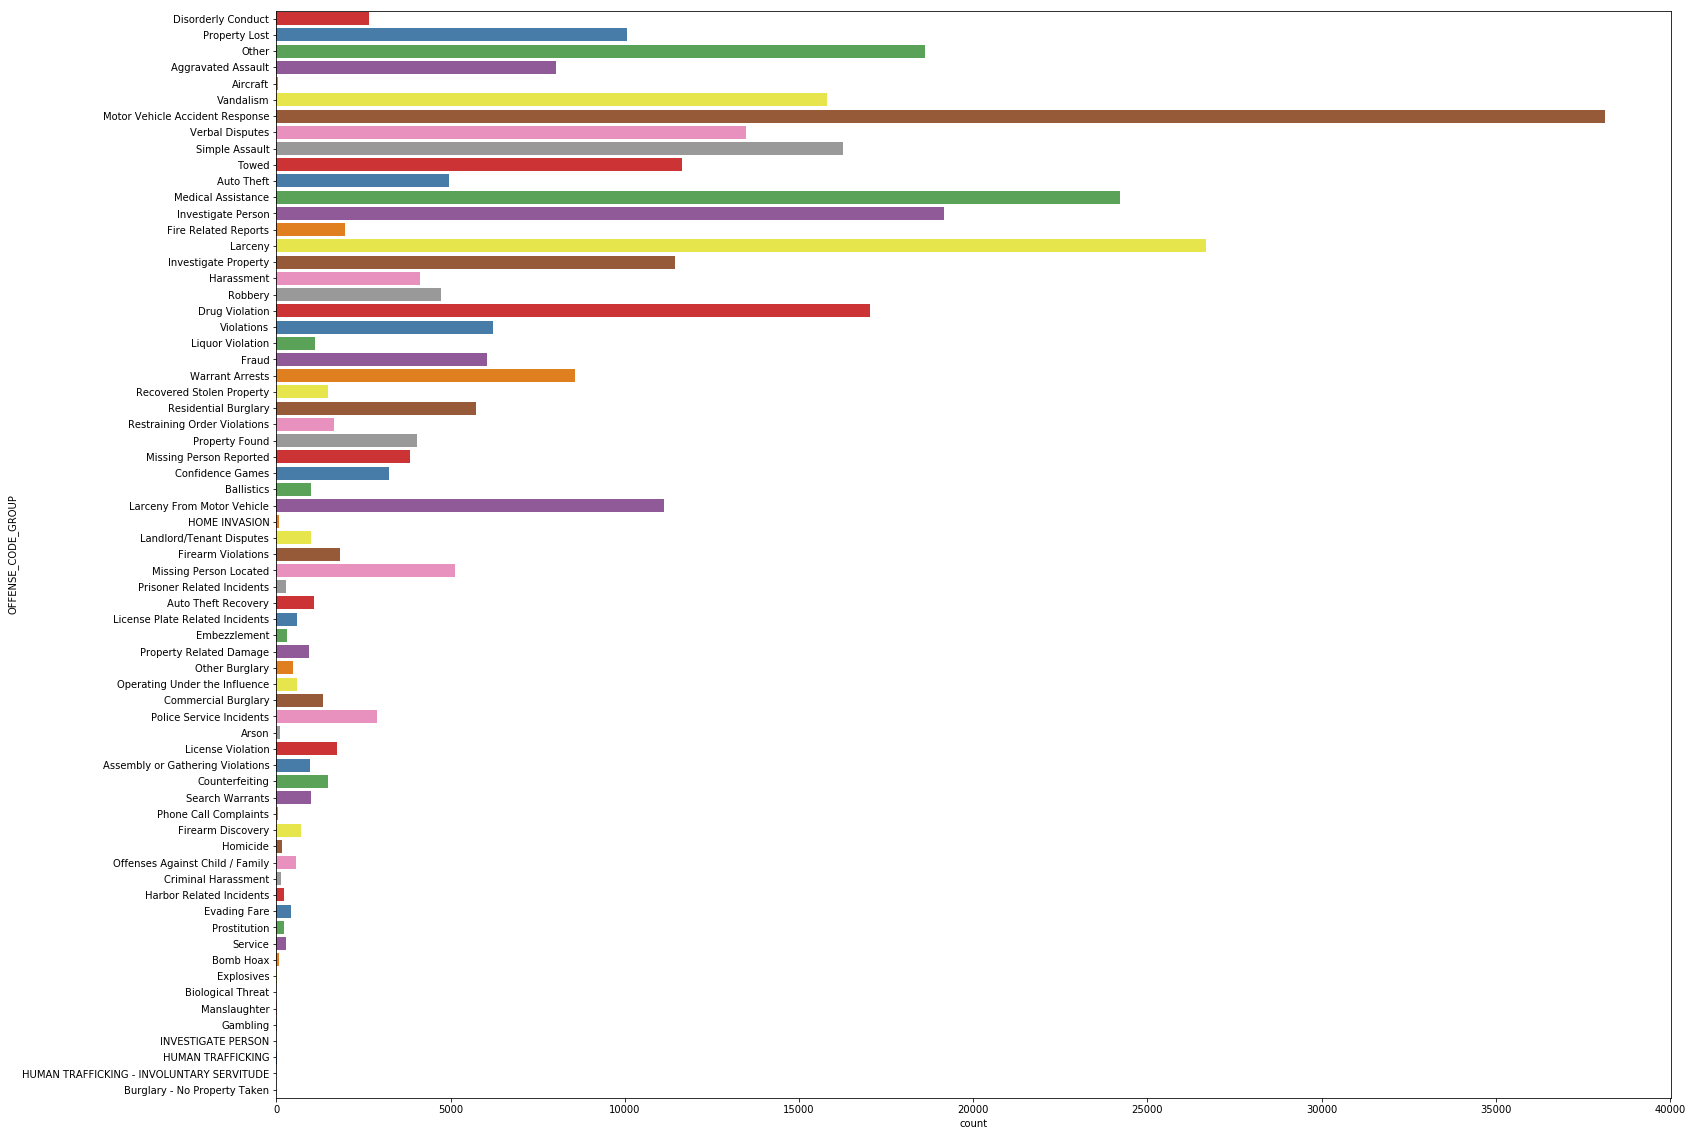

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 20))
sns.countplot(y="OFFENSE_CODE_GROUP", data=df, palette="Set1",);

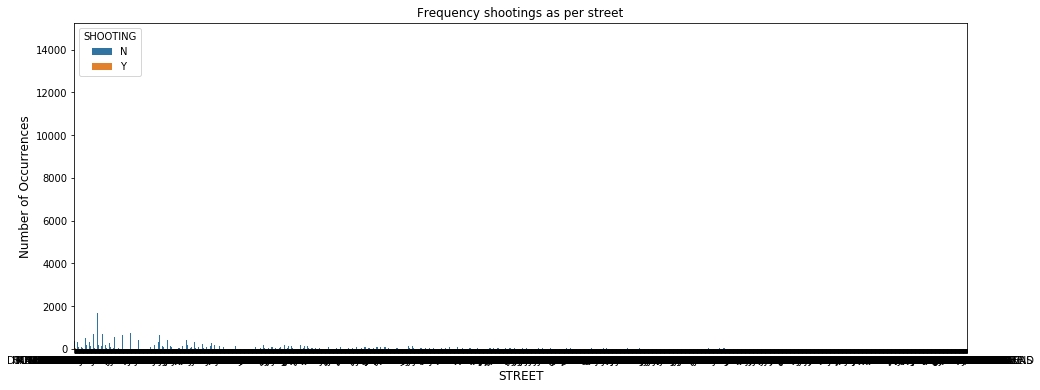

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
sns.countplot("STREET", hue="SHOOTING", data = df) # Which street has reported more number of shootings
plt.xlabel('STREET', fontsize=12)
plt.title('Frequency shootings as per street')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

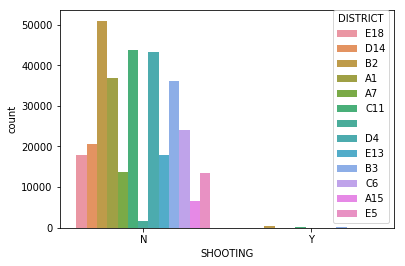

In [44]:
sns.countplot("SHOOTING", hue="DISTRICT", data = df)

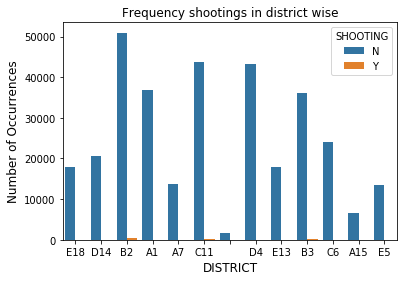

In [45]:
import matplotlib.pyplot as plt
sns.countplot("DISTRICT", hue="SHOOTING", data = df) # Which district has reported more number of shootings
plt.xlabel('DISTRICT', fontsize=12)
plt.title('Frequency shootings in district wise')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

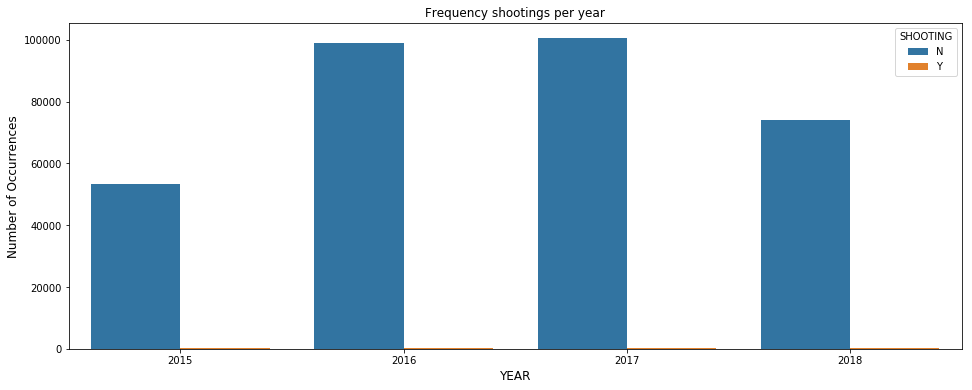

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
sns.countplot("YEAR", hue="SHOOTING", data = df) # Which offense has reported more number of shootings
plt.xlabel('YEAR', fontsize=12)
plt.title('Frequency shootings per year')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

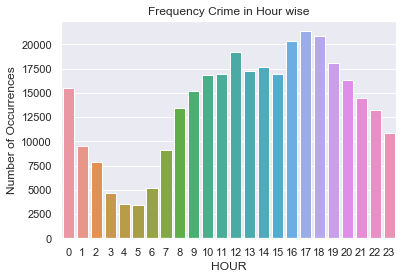

In [47]:
df_count= df['HOUR'].value_counts()
sns.set(style="darkgrid")
sns.barplot(df_count.index,df_count.values,alpha=1) # Find which hour the crime is more
plt.xlabel('HOUR', fontsize=12)
plt.title('Frequency Crime in Hour wise')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

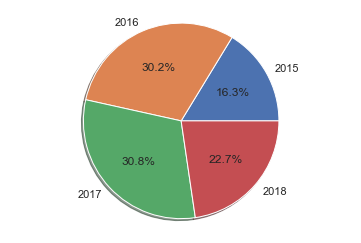

In [48]:
# Percentage in year wise
labels = df['YEAR'].astype('category').cat.categories.tolist()
counts = df['YEAR'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,  autopct='%1.1f%%',shadow=True) 
ax1.axis('equal')
plt.show()

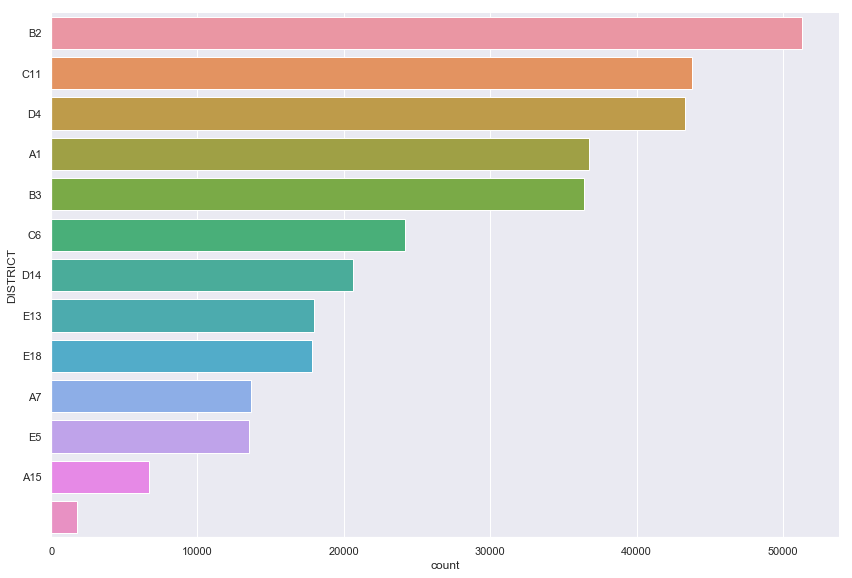

In [49]:
# District wise count
sns.catplot(y='DISTRICT',
           kind='count',
            height=8, 
            aspect=1.5,
            order=df.DISTRICT.value_counts().index,
           data=df)

In [50]:
df.to_csv("revised_dataset.csv", sep='\t', encoding = "ISO-8859-1")